## K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

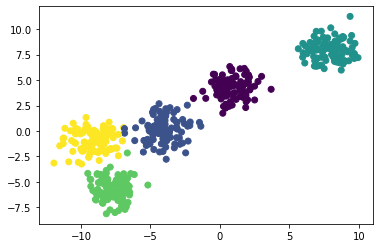

In [3]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
k = 5
color = ["green","red","yellow","blue","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center': center,
        'color': color[i],
        'points': points
    }
    
    clusters[i] = cluster
    

In [5]:
print(clusters)

{0: {'center': array([5.01496712, 6.63216885]), 'color': 'green', 'points': []}, 1: {'center': array([ 8.39189969, -1.80341169]), 'color': 'red', 'points': []}, 2: {'center': array([-5.34935998, -3.79048482]), 'color': 'yellow', 'points': []}, 3: {'center': array([-5.9248476 , -9.22037177]), 'color': 'blue', 'points': []}, 4: {'center': array([-1.69496278, -4.37929656]), 'color': 'orange', 'points': []}}


In [6]:
def distance(v1,v2):
    return np.sqrt(sum((v1-v2)**2))

In [18]:
# E-Step
def assignPointsToClusters(clusters): 
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
        
        for i in range(k):
            d = distance(curr_x, clusters[i]['center'])
            dist.append(d)
        
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

In [29]:
# M-Step
def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
    

In [30]:
assignPointsToClusters(clusters)

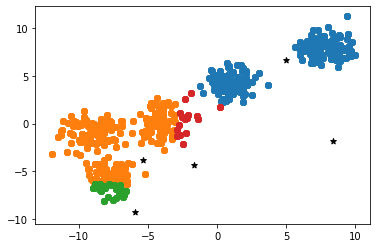

In [31]:
plotClusters(clusters)

In [33]:
def updateClusters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        
        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[i]['center'] = new_u
            clusters[i]['points'] = []

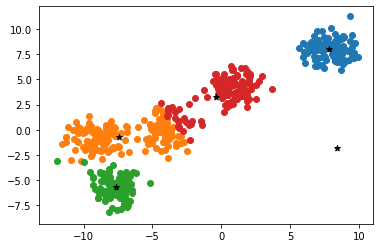

In [42]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)